In [1]:
import torch
print(torch.__version__)

2.4.1


In [2]:
a = torch.tensor([[2., 2.],
                [4., 4.]])
x = torch.tensor([[1.], [2.]])

In [3]:
a@x

tensor([[ 6.],
        [12.]])

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu" 
print(f"Using {device} device")

Using cpu device


In [5]:
a.device

device(type='cpu')

In [6]:
a.to(device)

tensor([[2., 2.],
        [4., 4.]])

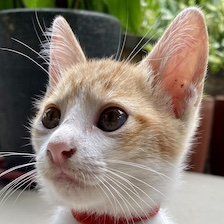

In [7]:
# image loader
from PIL import Image
img = Image.open("assets/wonder_cat.jpg")
display(img)

In [8]:
# image loader using torchvision
# libraries not as mature
import torchvision
img_torch = torchvision.io.read_image("assets/wonder_cat.jpg")
img = torchvision.transforms.ToPILImage()(img_torch)

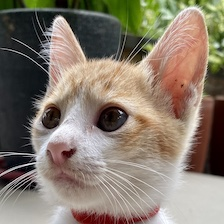

In [13]:
display(img)

In [10]:
img_torch

tensor([[[ 31,  29,  27,  ..., 194, 211, 221],
         [ 30,  29,  28,  ..., 188, 192, 209],
         [ 29,  29,  27,  ..., 177, 195, 212],
         ...,
         [195, 195, 195,  ..., 211, 211, 211],
         [197, 197, 196,  ..., 211, 211, 211],
         [199, 198, 196,  ..., 211, 211, 211]],

        [[ 54,  52,  49,  ..., 210, 224, 235],
         [ 52,  51,  50,  ..., 204, 208, 223],
         [ 53,  53,  50,  ..., 193, 211, 228],
         ...,
         [194, 194, 194,  ..., 212, 212, 212],
         [196, 196, 195,  ..., 212, 212, 212],
         [198, 197, 195,  ..., 212, 212, 212]],

        [[  2,   0,   2,  ..., 148, 155, 160],
         [  3,   2,   3,  ..., 142, 137, 148],
         [  5,   5,   4,  ..., 128, 140, 155],
         ...,
         [189, 189, 189,  ..., 207, 207, 207],
         [191, 191, 190,  ..., 207, 207, 207],
         [193, 192, 190,  ..., 207, 207, 207]]], dtype=torch.uint8)

In [11]:
# load text data
words = {"hello": 0, "world": 1}
embed_len = len(words)
embed_dim = 4
embed = torch.nn.Embedding(embed_len, embed_dim)
lookup = torch.tensor([words["hello"]], dtype=torch.long)
embed(lookup)

tensor([[ 1.4472, -0.2014, -0.9978, -1.2504]], grad_fn=<EmbeddingBackward0>)

In [14]:
# load audio/speech
import librosa
wav, sample_rate = librosa.load("assets/ljspeech.wav")
# plot_waveform(wav, sample_rate) # doesnt work

# Pre Trained Models   

In [15]:
resnet = torchvision.models.resnet18(pretrained=True)

/Users/cayasryan/Downloads/AI 222 231 Repos/Cayas-AI-231/ai231-venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cayasryan/Downloads/AI 222 231 Repos/Cayas-AI-231/ai231-venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/cayasryan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:24<00:00, 1.92MB/s]


In [30]:
from PIL import Image
import torchvision.transforms as transforms
img = Image.open("assets/wonder_cat.jpg")
img = transforms.ToTensor()(img)

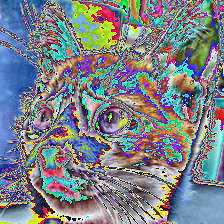

In [31]:
# prepare data for model ingestion
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # statistics of the imagenet dataset
transform = transforms.Compose([
                      transforms.Resize(256),
                      transforms.CenterCrop(224),
                      transforms.ToTensor(),
                      normalize,])

# PIL image undergoes transforms.
img = torchvision.transforms.ToPILImage()(img)
img = transform(img)
img_PIL = torchvision.transforms.ToPILImage()(img)
display(img_PIL)

In [32]:
from einops import rearrange

resnet.eval() # Model must be in evaluation mode
img = rearrange(img, 'c h w -> 1 c h w') # Ensure that there is a batch dim.

# Do the inference in no gradient tracking context:
with torch.no_grad():
    pred = resnet(img)

pred.shape

# Finally, get the index of the maximum probability:
pred = torch.argmax(pred, dim=1)
print(pred) # 285 is the index of the class "Egyptian cat"
    # need json file of imagenet classes to get the class name

tensor([285])


In [40]:
# optimizer
model = resnet
optim = torch.optim.SGD(model.parameters(),
                       lr=1e-2,
                        momentum=0.9)

# full step in page 40 of PyTorch notes